# Subsetting and filtering ATL24 data

### Imports

In [1]:
from sliderule import sliderule
import matplotlib.pyplot as plt
import numpy as np

### Configuration

In [2]:
# configure sliderule to output verbose log messages
sliderule.init(verbose=True)

True

### Plotting Helper Variables and Functions

In [3]:
# color map for ATL24 classifications
COLORS = {
    0: ['gray', 'unclassified'],
    40: ['red', 'bathymetry'],
    41: ['blue', 'sea_surface']
}

In [4]:
# plot ATL24 dataframes
def plot_atl24(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    if column == None:
        for class_val, color_name in COLORS.items():
            ii=gdf["class_ph"]==class_val
            ax.plot(gdf['x_atc'][ii]-start_xatc, gdf['ortho_h'][ii], 'o', markersize=1, color=color_name[0], label=color_name[1])
    else:
        sc = ax.scatter(gdf['x_atc']-start_xatc, gdf['ortho_h'], c=gdf[column], cmap='viridis')
    ax.set_xlim(x_min, x_max)
    plt.show()

In [5]:
# plot ATL06 dataframes
def plot_atl06(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    ax.plot(gdf['x_atc']-start_xatc, gdf['h_mean'], 'o', markersize=5, color='red')
    ax.set_xlim(x_min, x_max)
    plt.show()

In [6]:
# plot ATL03 dataframes
def plot_atl03(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    if column == None:
        for class_val, color_name in COLORS.items():
            ii=gdf["atl24_class"]==class_val
            ax.plot(gdf['x_atc'][ii]-start_xatc, gdf['height'][ii], 'o', markersize=1, color=color_name[0], label=color_name[1])
    else:
        sc = ax.scatter(gdf['x_atc']-start_xatc, gdf['height'], c=gdf[column], cmap='viridis')
    ax.set_xlim(x_min, x_max)
    plt.show()

### Define Area of Interest (north short of Dominican Republic)

In [7]:
aoi = [ { "lat": 19.42438470712139, "lon": -69.79907695695609  },
        { "lat": 19.31125534696085,  "lon": -69.79907695695609 },
        { "lat": 19.31125534696085,  "lon": -69.33527941905237 },
        { "lat": 19.42438470712139,  "lon": -69.33527941905237 },
        { "lat": 19.42438470712139,  "lon": -69.79907695695609 } ]

## (1) Quick Access

In [8]:
gdf1 = sliderule.run("atl24x", {}, aoi=aoi)

request <AppServer.63401> retrieved 110 resources
Starting proxy for atl24x to process 110 resource(s) with 21 thread(s)
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt3l] with 0 rows and 9 columns
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt3r] with 0 rows and 9 columns
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt1l] with 0 rows and 9 columns
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt1r] with 0 rows and 9 columns
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt2r] with 0 rows and 9 columns
request <AppServer.63403> on ATL24_20191010025128_02020501_006_02_001_01.h5 generated dataframe [gt2l] with 0 rows and 9 columns
Successfully completed processing resource [11 out of 110]: ATL24_20191010025128_02020501_006_02_001_01.h

In [9]:
gdf1

region  class_ph  gt  surface_h  rgt  \
time_ns                                                               
2019-11-08 01:32:34.825616384       1        40  10   0.710811  644   
2023-05-02 12:50:14.326538240       1        40  20   0.406010  644   
2023-05-02 12:50:14.327038208       1        40  20   0.405745  644   
2023-05-02 12:50:14.328338432       1        40  20   0.405524  644   
2019-11-08 01:32:33.932916480       1        40  20   0.445832  644   
...                               ...       ...  ..        ...  ...   
2022-02-09 22:17:07.321392384       7        40  10   0.160027  758   
2022-02-09 22:17:07.445892352       7        40  10   0.148136  758   
2022-02-09 22:17:07.457992192       7        40  10   0.158470  758   
2022-02-09 22:17:07.459892224       7        40  10   0.161492  758   
2022-02-09 22:17:07.875192320       7        40  10   0.156143  758   

                                 ortho_h  confidence  spot         x_atc  \
time_ns                                                                    
2019-11-08 01:32:34.825616384   0.180739    0.520178     6  2.155871e+06   
2023-05-02 12:50:14.326538240 -12.788120    0.671218     2  2.156342e+06   
2023-05-02 12:50:14.327038208 -12.666311    0.671218     2  2.156346e+06   
2023-05-02 12:50:14.328338432 -13.363586    0.702775     2  2.156355e+06   
2019-11-08 01:32:33.932916480  -1.255124    0.596972     5  2.147107e+06   
...                                  ...         ...   ...           ...   
2022-02-09 22:17:07.321392384  -0.406316    0.474827     1  1.791981e+07   
2022-02-09 22:17:07.445892352  -0.558021    0.346992     1  1.792070e+07   
2022-02-09 22:17:07.457992192  -0.349574    0.395246     1  1.792078e+07   
2022-02-09 22:17:07.459892224  -0.555390    0.382392     1  1.792080e+07   
2022-02-09 22:17:07.875192320  -0.580575    0.393387     1  1.792375e+07   

                                     y_atc  srcid  cycle  \
time_ns                                                    
2019-11-08 01:32:34.825616384  3229.788818      6      5   
2023-05-02 12:50:14.326538240  8272.911133     11     19   
2023-05-02 12:50:14.327038208  8272.917969     11     19   
2023-05-02 12:50:14.328338432  8272.960938     11     19   
2019-11-08 01:32:33.932916480  3143.649414     12      5   
...                                    ...    ...    ...   
2022-02-09 22:17:07.321392384  3223.599854    659     14   
2022-02-09 22:17:07.445892352  3224.343018    659     14   
2022-02-09 22:17:07.457992192  3224.120605    659     14   
2022-02-09 22:17:07.459892224  3224.084717    659     14   
2022-02-09 22:17:07.875192320  3224.938965    659     14   

                                                 geometry  
time_ns                                                    
2019-11-08 01:32:34.825616384  POINT (-69.34873 19.38997)  
2023-05-02 12:50:14.326538240  POINT (-69.39694 19.38970)  
2023-05-02 12:50:14.327038208  POINT (-69.39695 19.38973)  
2023-05-02 12:50:14.328338432  POINT (-69.39695 19.38981)  
2019-11-08 01:32:33.932916480  POINT (-69.33968 19.31126)  
...                                                   ...  
2022-02-09 22:17:07.321392384  POINT (-69.75101 19.34962)  
2022-02-09 22:17:07.445892352  POINT (-69.75183 19.34165)  
2022-02-09 22:17:07.457992192  POINT (-69.75192 19.34088)  
2022-02-09 22:17:07.459892224  POINT (-69.75193 19.34076)  
2022-02-09 22:17:07.875192320  POINT (-69.75470 19.31418)  

[44382 rows x 13 columns]

<Axes: >

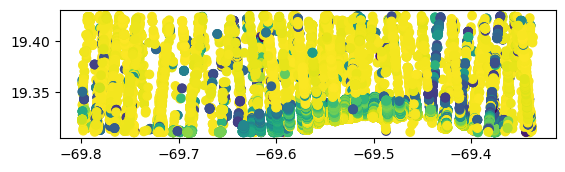

In [10]:
gdf1.plot(column='ortho_h', cmap='viridis')

## (2) Access a Single Track

In [11]:
gdf2 = sliderule.run("atl24x", {"beams": "gt3r", "rgt": 202, "cycle": 12}, aoi=aoi)

request <AppServer.64336> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.80598> on ATL24_20210706203010_02021201_006_01_001_01.h5 generated dataframe [gt3r] with 861 rows and 9 columns
Successfully completed processing resource [1 out of 1]: ATL24_20210706203010_02021201_006_01_001_01.h5
Writing arrow file: /tmp/tmpb7vop19_
Closing arrow file: /tmp/tmpb7vop19_


In [12]:
gdf2

region  class_ph  gt  surface_h  rgt  \
time_ns                                                               
2021-07-06 20:35:11.700463360       1        40  60   0.469926  202   
2021-07-06 20:35:11.700663040       1        40  60   0.470413  202   
2021-07-06 20:35:11.701063168       1        40  60   0.471875  202   
2021-07-06 20:35:11.701463296       1        40  60   0.473334  202   
2021-07-06 20:35:11.701463296       1        40  60   0.473334  202   
...                               ...       ...  ..        ...  ...   
2021-07-06 20:35:12.498863104       1        40  60   0.550554  202   
2021-07-06 20:35:12.505863168       1        40  60   0.544213  202   
2021-07-06 20:35:12.505963264       1        40  60   0.543939  202   
2021-07-06 20:35:13.290263296       1        40  60   0.319864  202   
2021-07-06 20:35:13.291063296       1        40  60   0.318421  202   

                                 ortho_h  confidence  spot         x_atc  \
time_ns                                                                    
2021-07-06 20:35:11.700463360  -1.126599    0.835062     1  2.147674e+06   
2021-07-06 20:35:11.700663040  -0.581132    0.834389     1  2.147675e+06   
2021-07-06 20:35:11.701063168  -0.498628    0.902136     1  2.147678e+06   
2021-07-06 20:35:11.701463296  -0.584890    0.903411     1  2.147681e+06   
2021-07-06 20:35:11.701463296  -0.621778    0.896865     1  2.147681e+06   
...                                  ...         ...   ...           ...   
2021-07-06 20:35:12.498863104 -16.173004    0.524065     1  2.153354e+06   
2021-07-06 20:35:12.505863168 -16.016087    0.686516     1  2.153404e+06   
2021-07-06 20:35:12.505963264 -16.114712    0.686516     1  2.153405e+06   
2021-07-06 20:35:13.290263296  -0.194343    0.444378     1  2.158985e+06   
2021-07-06 20:35:13.291063296  -0.165891    0.444378     1  2.158991e+06   

                                     y_atc  srcid  cycle  \
time_ns                                                    
2021-07-06 20:35:11.700463360 -3246.468750      0     12   
2021-07-06 20:35:11.700663040 -3246.466553      0     12   
2021-07-06 20:35:11.701063168 -3246.469727      0     12   
2021-07-06 20:35:11.701463296 -3246.474121      0     12   
2021-07-06 20:35:11.701463296 -3246.474365      0     12   
...                                    ...    ...    ...   
2021-07-06 20:35:12.498863104 -3247.080811      0     12   
2021-07-06 20:35:12.505863168 -3247.115967      0     12   
2021-07-06 20:35:12.505963264 -3247.118896      0     12   
2021-07-06 20:35:13.290263296 -3247.446289      0     12   
2021-07-06 20:35:13.291063296 -3247.463623      0     12   

                                                 geometry  
time_ns                                                    
2021-07-06 20:35:11.700463360  POINT (-69.53933 19.32204)  
2021-07-06 20:35:11.700663040  POINT (-69.53934 19.32205)  
2021-07-06 20:35:11.701063168  POINT (-69.53934 19.32207)  
2021-07-06 20:35:11.701463296  POINT (-69.53934 19.32210)  
2021-07-06 20:35:11.701463296  POINT (-69.53934 19.32210)  
...                                                   ...  
2021-07-06 20:35:12.498863104  POINT (-69.54465 19.37310)  
2021-07-06 20:35:12.505863168  POINT (-69.54469 19.37355)  
2021-07-06 20:35:12.505963264  POINT (-69.54469 19.37356)  
2021-07-06 20:35:13.290263296  POINT (-69.54991 19.42373)  
2021-07-06 20:35:13.291063296  POINT (-69.54992 19.42378)  

[861 rows x 13 columns]

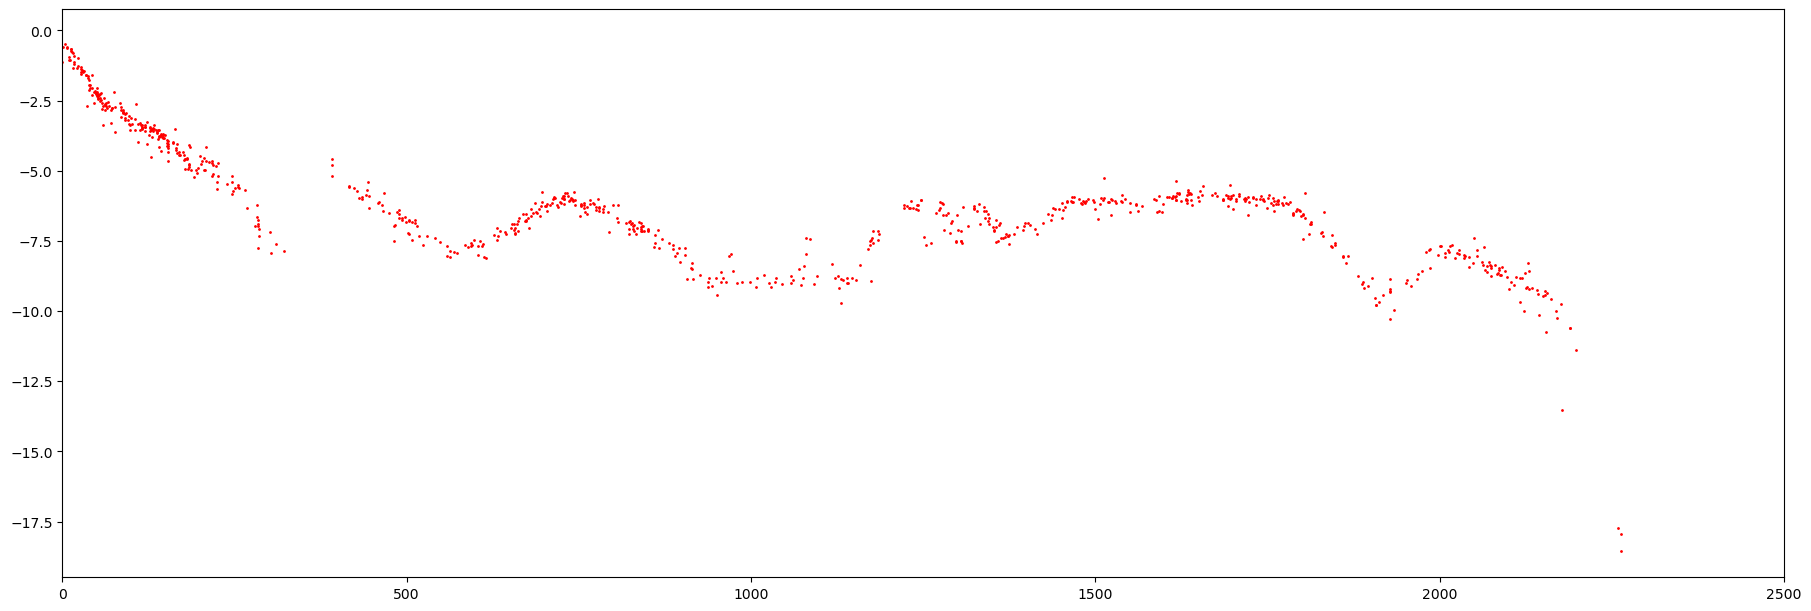

In [13]:
plot_atl24(gdf2, 0, 2500)

## (3) Detailed Access of a Single Track

In [14]:
parms = {
    "atl24": {
        "compact": False,
        "confidence_threshold": 0.0,
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "beams": "gt3r",
    "rgt": 202,
    "cycle": 12
}
gdf3 = sliderule.run("atl24x", parms, aoi=aoi)

request <AppServer.65190> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.65191> on ATL24_20210706203010_02021201_006_01_001_01.h5 generated dataframe [gt3r] with 35527 rows and 17 columns
Successfully completed processing resource [1 out of 1]: ATL24_20210706203010_02021201_006_01_001_01.h5
Writing arrow file: /tmp/tmpeqf2fes_
Closing arrow file: /tmp/tmpeqf2fes_


In [15]:
gdf3

sensor_depth_exceeded  night_flag  region  \
time_ns                                                                    
2021-07-06 20:35:11.531963136                      0           0       1   
2021-07-06 20:35:11.531963136                      0           0       1   
2021-07-06 20:35:11.532163072                      0           0       1   
2021-07-06 20:35:11.532163072                      0           0       1   
2021-07-06 20:35:11.532263168                      0           0       1   
...                                              ...         ...     ...   
2021-07-06 20:35:13.300163328                      0           0       1   
2021-07-06 20:35:13.300163328                      0           0       1   
2021-07-06 20:35:13.300263168                      0           0       1   
2021-07-06 20:35:13.300263168                      0           0       1   
2021-07-06 20:35:13.300363264                      0           0       1   

                               class_ph  gt  sigma_tvu  surface_h  \
time_ns                                                             
2021-07-06 20:35:11.531963136         0  60   0.133018   0.367559   
2021-07-06 20:35:11.531963136         0  60   0.133018   0.367559   
2021-07-06 20:35:11.532163072         0  60   0.133018   0.367595   
2021-07-06 20:35:11.532163072         0  60   0.133018   0.367595   
2021-07-06 20:35:11.532263168         0  60   0.133018   0.367631   
...                                 ...  ..        ...        ...   
2021-07-06 20:35:13.300163328        41  60   0.133019   0.302490   
2021-07-06 20:35:13.300163328        41  60   0.133019   0.302490   
2021-07-06 20:35:13.300263168         0  60   0.133019   0.302277   
2021-07-06 20:35:13.300263168        41  60   0.133019   0.302277   
2021-07-06 20:35:13.300363264         0  60   0.133019   0.302065   

                               invalid_wind_speed  sigma_thu  rgt  ...  \
time_ns                                                            ...   
2021-07-06 20:35:11.531963136                   0   7.071068  202  ...   
2021-07-06 20:35:11.531963136                   0   7.071068  202  ...   
2021-07-06 20:35:11.532163072                   0   7.071068  202  ...   
2021-07-06 20:35:11.532163072                   0   7.071068  202  ...   
2021-07-06 20:35:11.532263168                   0   7.071068  202  ...   
...                                           ...        ...  ...  ...   
2021-07-06 20:35:13.300163328                   0   7.071068  202  ...   
2021-07-06 20:35:13.300163328                   0   7.071068  202  ...   
2021-07-06 20:35:13.300263168                   0   7.071068  202  ...   
2021-07-06 20:35:13.300263168                   0   7.071068  202  ...   
2021-07-06 20:35:13.300363264                   0   7.071068  202  ...   

                               invalid_kd  low_confidence_flag    confidence  \
time_ns                                                                        
2021-07-06 20:35:11.531963136           1                    0  1.005813e-07   
2021-07-06 20:35:11.531963136           1                    0  1.759629e-07   
2021-07-06 20:35:11.532163072           1                    0  4.991626e-07   
2021-07-06 20:35:11.532163072           1                    0  1.759629e-07   
2021-07-06 20:35:11.532263168           1                    0  1.759629e-07   
...                                   ...                  ...           ...   
2021-07-06 20:35:13.300163328           0                    0  6.079129e-04   
2021-07-06 20:35:13.300163328           0                    0  9.107706e-06   
2021-07-06 20:35:13.300263168           0                    0  1.364828e-07   
2021-07-06 20:35:13.300263168           0                    0  9.107706e-06   
2021-07-06 20:35:13.300363264           0                    0  1.364828e-07   

                               spot         x_atc        y_atc  srcid  cycle  \
time_ns                                                     

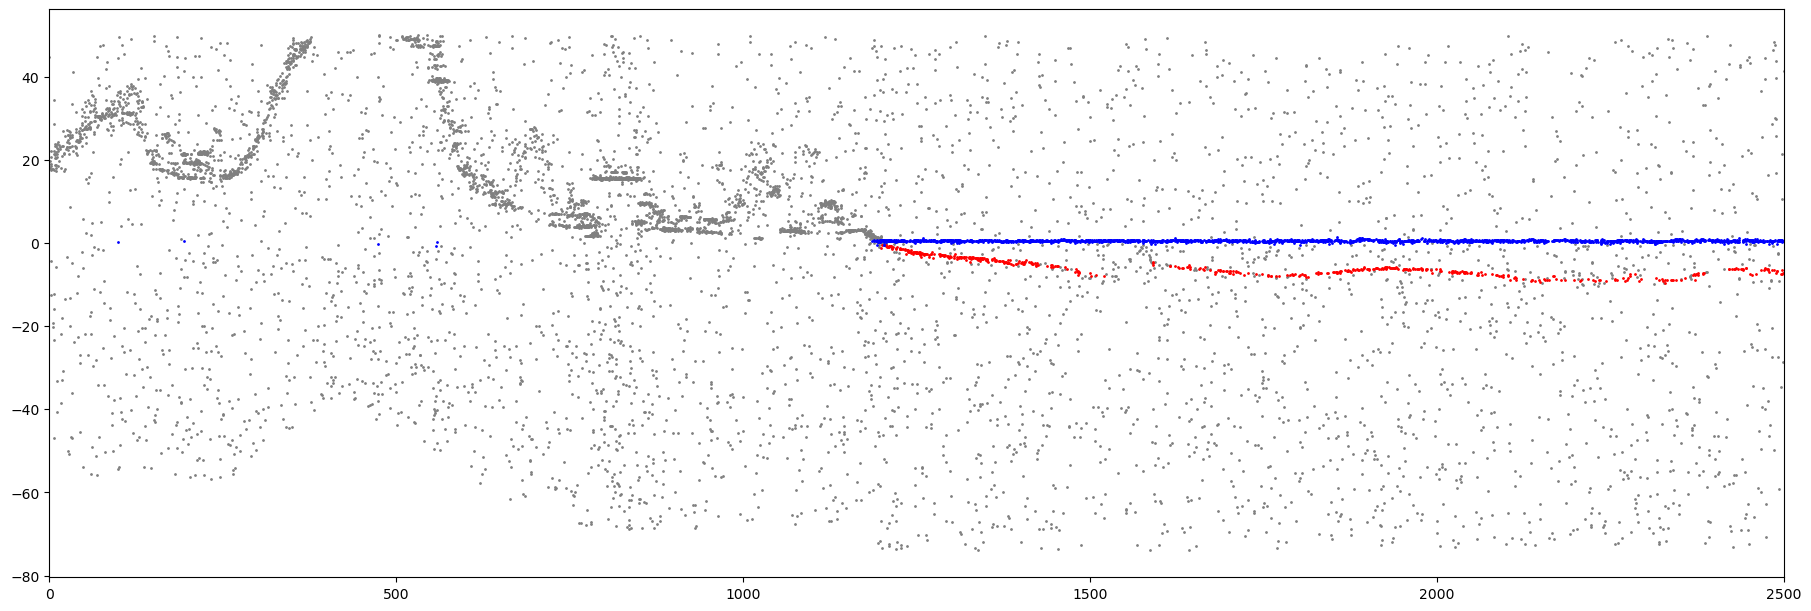

In [16]:
plot_atl24(gdf3, 0, 2500)

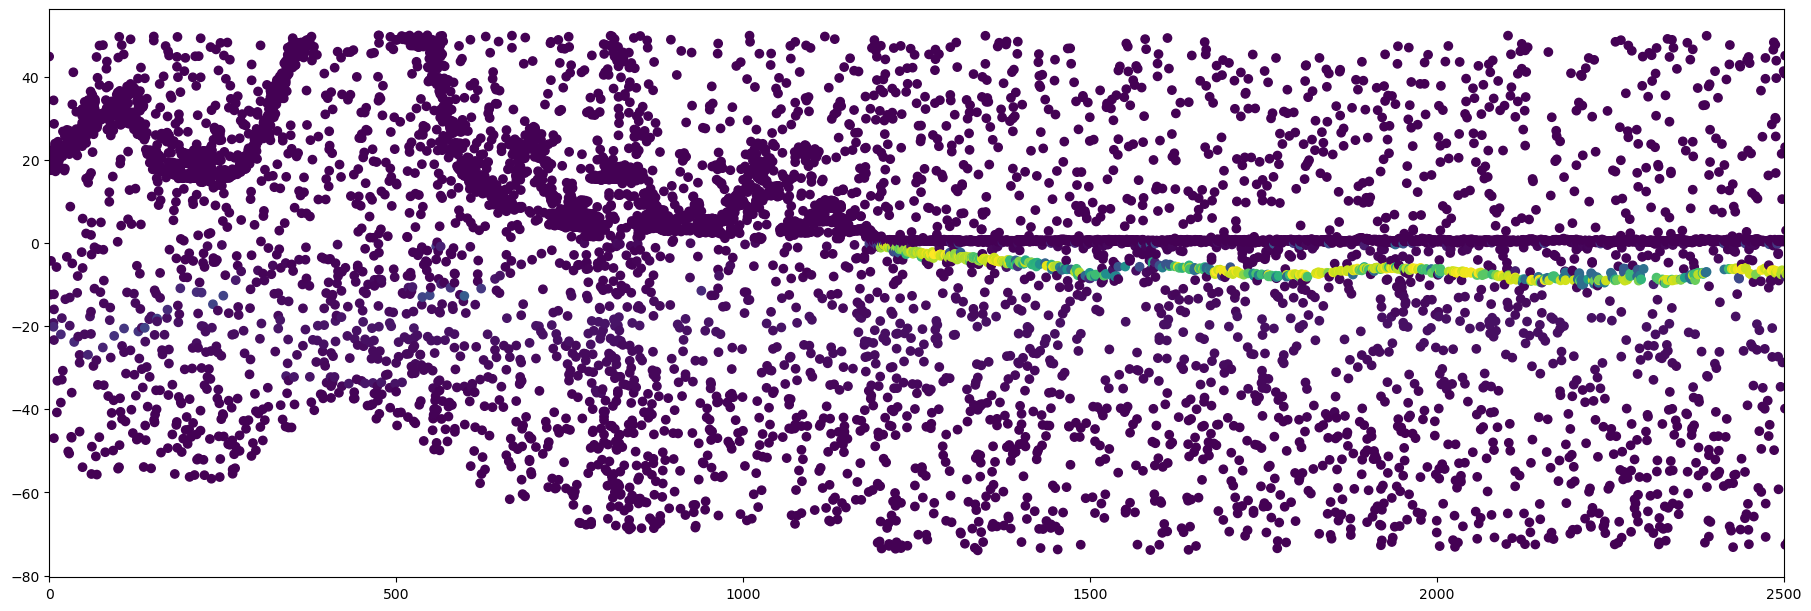

In [17]:
plot_atl24(gdf3, 0, 2500, "confidence")

## (4) Access All ATL03 Photons using ATL24 as a Classifier

In [18]:
parms = {
    "atl24": {
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "cnf": -1,
    "beams": "gt3r",
    "rgt": 202,
    "cycle": 12
}
gdf4 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.64344> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.93189> on ATL03_20210706203010_02021201_006_01.h5 generated dataframe [gt3r] with 92953 rows and 14 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmp295d43h4
Closing arrow file: /tmp/tmp295d43h4


In [19]:
gdf4

region  gt  spacecraft_velocity  atl24_class  \
time_ns                                                                       
2021-07-06 20:35:11.530563072       1  60          7118.208496            0   
2021-07-06 20:35:11.530563072       1  60          7118.208496            0   
2021-07-06 20:35:11.530563072       1  60          7118.208496            0   
2021-07-06 20:35:11.530563072       1  60          7118.208496            0   
2021-07-06 20:35:11.530563072       1  60          7118.208496            0   
...                               ...  ..                  ...          ...   
2021-07-06 20:35:13.300763136       1  60          7118.194336            0   
2021-07-06 20:35:13.300863232       1  60          7118.194336           41   
2021-07-06 20:35:13.300863232       1  60          7118.194336           41   
2021-07-06 20:35:13.300863232       1  60          7118.194336            0   
2021-07-06 20:35:13.300863232       1  60          7118.194336            0   

                               solar_elevation  atl24_confidence  rgt  \
time_ns                                                                 
2021-07-06 20:35:11.530563072        36.057114          0.000000  202   
2021-07-06 20:35:11.530563072        36.057114          0.000000  202   
2021-07-06 20:35:11.530563072        36.057114          0.000000  202   
2021-07-06 20:35:11.530563072        36.057114          0.000000  202   
2021-07-06 20:35:11.530563072        36.057114          0.000000  202   
...                                        ...               ...  ...   
2021-07-06 20:35:13.300763136        36.089127          0.000000  202   
2021-07-06 20:35:13.300863232        36.089127          0.000837  202   
2021-07-06 20:35:13.300863232        36.089127          0.000837  202   
2021-07-06 20:35:13.300863232        36.089127          0.000000  202   
2021-07-06 20:35:13.300863232        36.089127          0.000000  202   

                               ph_index      height  spot         x_atc  \
time_ns                                                                   
2021-07-06 20:35:11.530563072  12915859  275.984528     1  2.146466e+06   
2021-07-06 20:35:11.530563072  12915860  241.720047     1  2.146466e+06   
2021-07-06 20:35:11.530563072  12915861  -87.425362     1  2.146465e+06   
2021-07-06 20:35:11.530563072  12915862 -125.022743     1  2.146465e+06   
2021-07-06 20:35:11.530563072  12915863 -164.023651     1  2.146465e+06   
...                                 ...         ...   ...           ...   
2021-07-06 20:35:13.300763136  13008807   54.988625     1  2.159060e+06   
2021-07-06 20:35:13.300863232  13008808  -45.229034     1  2.159061e+06   
2021-07-06 20:35:13.300863232  13008809  -45.241188     1  2.159061e+06   
2021-07-06 20:35:13.300863232  13008810 -111.962166     1  2.159061e+06   
2021-07-06 20:35:13.300863232  13008811 -346.019562     1  2.159060e+06   

                                     y_atc  srcid  cycle  atl03_cnf  \
time_ns                                                               
2021-07-06 20:35:11.530563072 -3244.365723      0     12          0   
2021-07-06 20:35:11.530563072 -3244.567871      0     12          0   
2021-07-06 20:35:11.530563072 -3246.509766      0     12          0   
2021-07-06 20:35:11.530563072 -3246.731689      0     12          0   
2021-07-06 20:35:11.530563072 -3246.961914      0     12          0   
...                                    ...    ...    ...        ...   
2021-07-06 20:35:13.300763136 -3247.083740      0     12          0   
2021-07-06 20:35:13.300863232 -3247.677246      0     12          4   
2021-07-06 20:35:13.300863232 -3247.677246      0     12          4   
2021-07-06 20:35:13.300863232 -3248.071289      0     12          0   
2021-07-06 20:35:13.300863232 -3249.453125      0     12          0   

                               background_rate  quality_ph  \
time_ns                                                      
2021-07-06 20:35:11.530563072

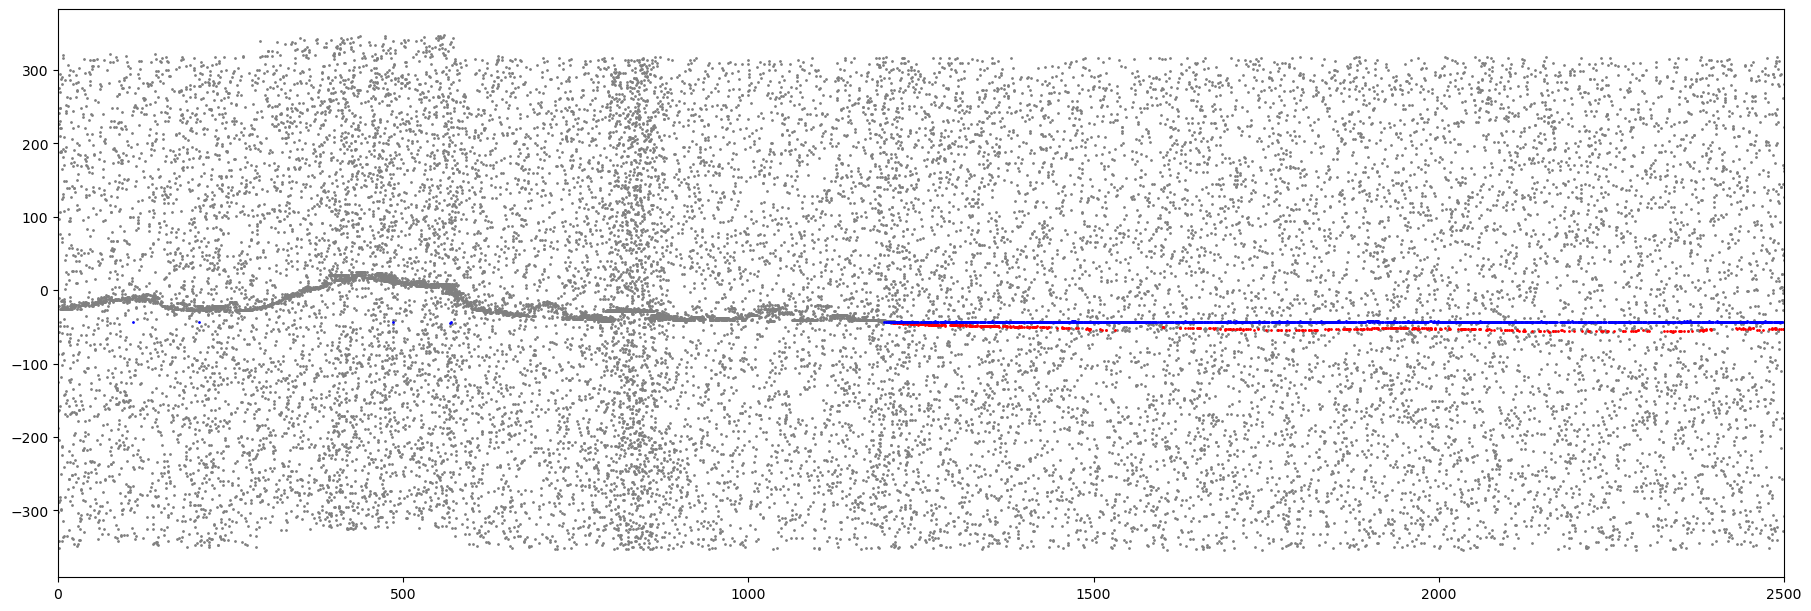

In [20]:
plot_atl03(gdf4, 0, 2500)

## (5) Combine ATL03 Filters with ATL24 Classification

In [21]:
parms = {
    "atl24": {
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "cnf": 2,
    "yapc": {
        "version": 0,
        "score": 100
    },
    "beams": "gt3r",
    "rgt": 202,
    "cycle": 12
}
gdf5 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.64297> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.65199> on ATL03_20210706203010_02021201_006_01.h5 generated dataframe [gt3r] with 20773 rows and 15 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmphli10s8z
Closing arrow file: /tmp/tmphli10s8z


In [22]:
gdf5

region  gt  spacecraft_velocity  atl24_class  \
time_ns                                                                       
2021-07-06 20:35:11.530663168       1  60          7118.208496            0   
2021-07-06 20:35:11.530963200       1  60          7118.208496            0   
2021-07-06 20:35:11.531063040       1  60          7118.208496            0   
2021-07-06 20:35:11.531163136       1  60          7118.208496            0   
2021-07-06 20:35:11.531263232       1  60          7118.208496            0   
...                               ...  ..                  ...          ...   
2021-07-06 20:35:13.300163328       1  60          7118.194336           41   
2021-07-06 20:35:13.300163328       1  60          7118.194336           41   
2021-07-06 20:35:13.300263168       1  60          7118.194336           41   
2021-07-06 20:35:13.300863232       1  60          7118.194336           41   
2021-07-06 20:35:13.300863232       1  60          7118.194336           41   

                               solar_elevation  atl24_confidence  yapc_score  \
time_ns                                                                        
2021-07-06 20:35:11.530663168        36.057114          0.000000          63   
2021-07-06 20:35:11.530963200        36.057114          0.000000         153   
2021-07-06 20:35:11.531063040        36.057114          0.000000         138   
2021-07-06 20:35:11.531163136        36.057114          0.000000          78   
2021-07-06 20:35:11.531263232        36.057114          0.000000         154   
...                                        ...               ...         ...   
2021-07-06 20:35:13.300163328        36.089127          0.000608         143   
2021-07-06 20:35:13.300163328        36.089127          0.000009         142   
2021-07-06 20:35:13.300263168        36.089127          0.000009         160   
2021-07-06 20:35:13.300863232        36.089127          0.000837         162   
2021-07-06 20:35:13.300863232        36.089127          0.000837         162   

                               rgt  ph_index     height  spot         x_atc  \
time_ns                                                                       
2021-07-06 20:35:11.530663168  202  12915866 -22.051737     1  2.146466e+06   
2021-07-06 20:35:11.530963200  202  12915888 -25.586315     1  2.146468e+06   
2021-07-06 20:35:11.531063040  202  12915897 -25.111528     1  2.146469e+06   
2021-07-06 20:35:11.531163136  202  12915898 -14.752754     1  2.146469e+06   
2021-07-06 20:35:11.531263232  202  12915907 -25.457888     1  2.146470e+06   
...                            ...       ...        ...   ...           ...   
2021-07-06 20:35:13.300163328  202  13008786 -45.176338     1  2.159056e+06   
2021-07-06 20:35:13.300163328  202  13008787 -44.635838     1  2.159056e+06   
2021-07-06 20:35:13.300263168  202  13008792 -44.625275     1  2.159057e+06   
2021-07-06 20:35:13.300863232  202  13008808 -45.229034     1  2.159061e+06   
2021-07-06 20:35:13.300863232  202  13008809 -45.241188     1  2.159061e+06   

                                     y_atc  srcid  cycle  atl03_cnf  \
time_ns                                                               
2021-07-06 20:35:11.530663168 -3246.126465      0     12          4   
2021-07-06 20:35:11.530963200 -3246.155029      0     12          4   
2021-07-06 20:35:11.531063040 -3246.154785      0     12          4   
2021-07-06 20:35:11.531163136 -3246.096191      0     12          2   
2021-07-06 20:35:11.531263232 -3246.162109      0     12          3   
...                                    ...    ...    ...        ...   
2021-07-06 20:35:13.300163328 -3247.663818      0     12          4   
2021-07-06 20:35:13.300163328 -3247.660645      0     12          3   
2021-07-06 20:35:13.300263168 -3247.662354      0     12          3   
2021-07-06 20:35:13.300863232 -3247.677246      0     12          4   
2021-07-06 20:35:13.300863232 -3247.677246      0     12          4   

          

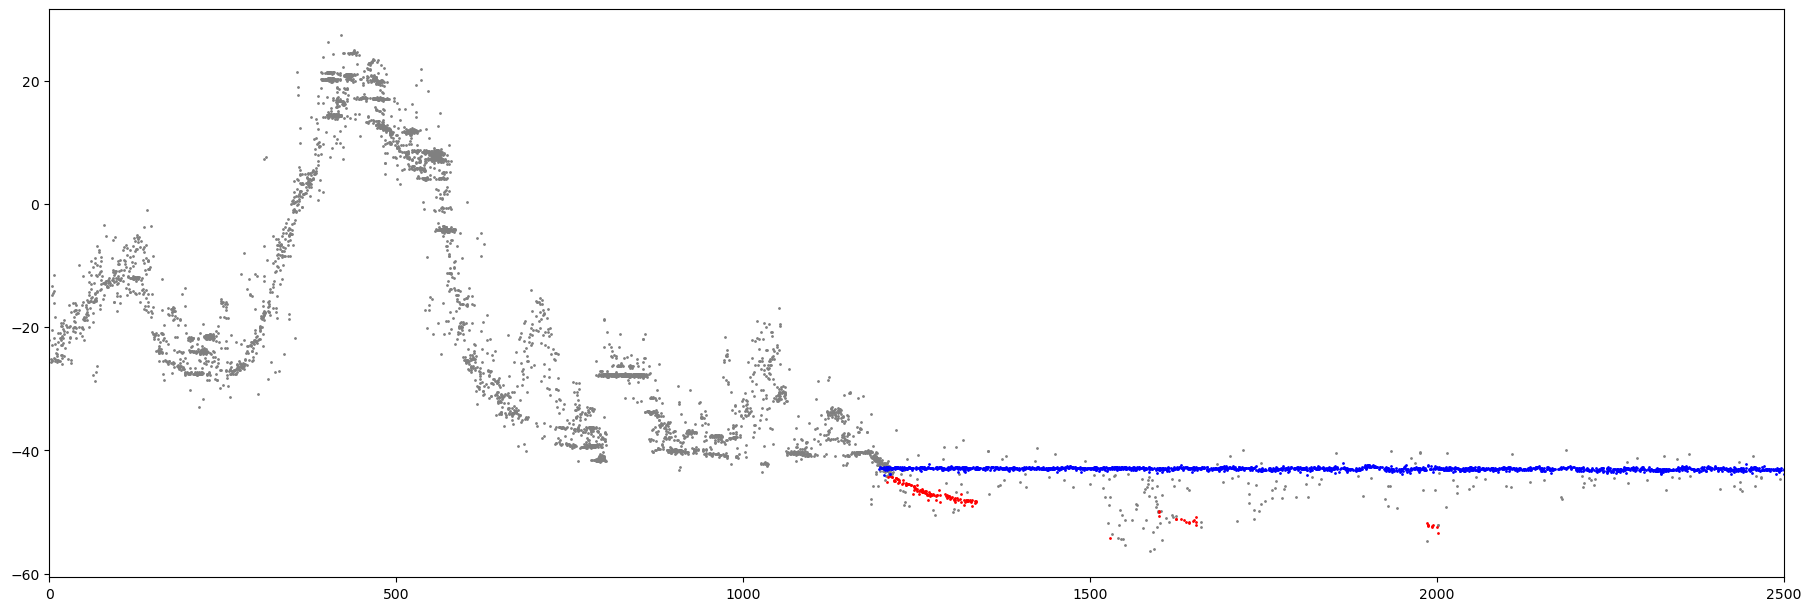

In [23]:
plot_atl03(gdf5, 0, 2500)

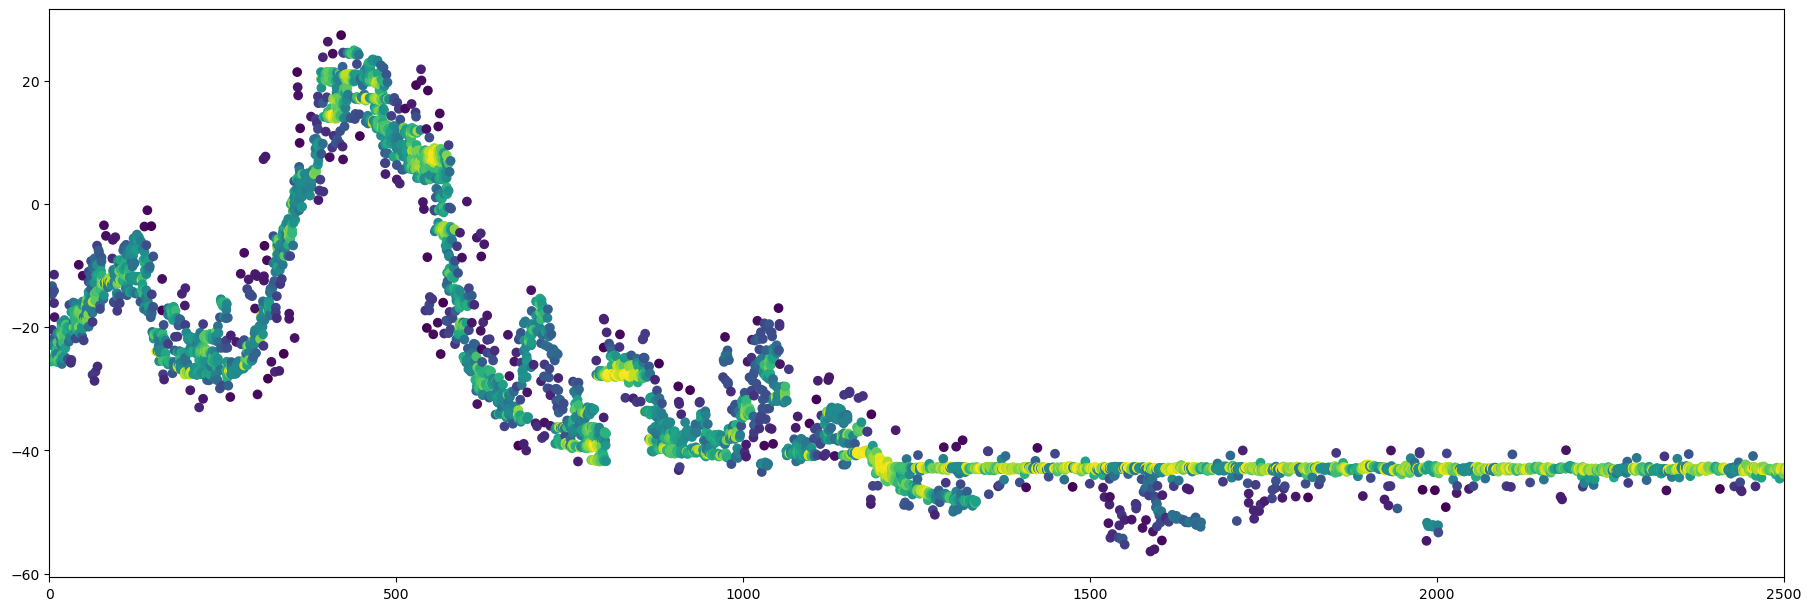

In [24]:
plot_atl03(gdf5, 0, 2500, "yapc_score")

## (6) Run ATL06-SR Surface Fitting Algorithm on ATL24 Classified Photons

In [25]:
parms = {
    "atl24": {
        "class_ph": ["bathymetry"]
    },
    "fit": {
        "res": 10,
        "len": 20,
        "pass_invalid": True
    },
    "cnf": -1,
    "beams": "gt3r",
    "rgt": 202,
    "cycle": 12
}
gdf6 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.63879> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.93195> on ATL03_20210706203010_02021201_006_01.h5 generated dataframe [gt3r] with 97 rows and 13 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpuyalk677
Closing arrow file: /tmp/tmpuyalk677


In [26]:
gdf6

pflags  region  gt  window_height  \
time_ns                                                            
2021-07-06 20:35:11.703563264       0       1  60       3.000000   
2021-07-06 20:35:11.706963456       0       1  60       3.000000   
2021-07-06 20:35:11.708363520       0       1  60       3.000000   
2021-07-06 20:35:11.712763904       0       1  60       3.000000   
2021-07-06 20:35:11.715163648       0       1  60       3.000000   
...                               ...     ...  ..            ...   
2021-07-06 20:35:12.017863168       2       1  60       3.612736   
2021-07-06 20:35:12.018463744       2       1  60       5.091844   
2021-07-06 20:35:12.505862656       2       1  60       3.000000   
2021-07-06 20:35:12.505963776       2       1  60       3.000000   
2021-07-06 20:35:13.291063296       2       1  60       3.000000   

                               photon_count  rgt    rms_misfit     h_mean  \
time_ns                                                                     
2021-07-06 20:35:11.703563264            37  202  3.242738e-01 -45.263340   
2021-07-06 20:35:11.706963456            49  202  3.066668e-01 -46.475677   
2021-07-06 20:35:11.708363520            43  202  3.673098e-01 -46.889820   
2021-07-06 20:35:11.712763904            32  202  3.335851e-01 -47.622890   
2021-07-06 20:35:11.715163648            38  202  2.957804e-01 -47.980106   
...                                     ...  ...           ...        ...   
2021-07-06 20:35:12.017863168             2  202  5.024296e-15 -67.658188   
2021-07-06 20:35:12.018463744             4  202  4.192414e-01 -68.138794   
2021-07-06 20:35:12.505862656             2  202  2.246933e-14 -65.983086   
2021-07-06 20:35:12.505963776             3  202  5.641853e-02 -66.049568   
2021-07-06 20:35:13.291063296             2  202  0.000000e+00 -45.674305   

                               dh_fit_dx         x_atc       h_sigma  spot  \
time_ns                                                                      
2021-07-06 20:35:11.703563264  -0.047593  2.147696e+06  5.331500e-02     1   
2021-07-06 20:35:11.706963456  -0.051964  2.147720e+06  4.528252e-02     1   
2021-07-06 20:35:11.708363520  -0.031286  2.147730e+06  5.684106e-02     1   
2021-07-06 20:35:11.712763904  -0.019678  2.147761e+06  6.193327e-02     1   
2021-07-06 20:35:11.715163648  -0.025870  2.147779e+06  4.829899e-02     1   
...                                  ...           ...           ...   ...   
2021-07-06 20:35:12.017863168  -0.139631  2.149933e+06  5.024296e-15     1   
2021-07-06 20:35:12.018463744   0.000571  2.149937e+06  2.419314e-01     1   
2021-07-06 20:35:12.505862656   0.004109  2.153404e+06  2.246933e-14     1   
2021-07-06 20:35:12.505963776   0.003644  2.153405e+06  3.989136e-02     1   
2021-07-06 20:35:13.291063296   0.006777  2.158991e+06  0.000000e+00     1   

                                     y_atc  srcid  cycle  photon_start  \
time_ns                                                                  
2021-07-06 20:35:11.703563264 -3246.497314      0     12      12931297   
2021-07-06 20:35:11.706963456 -3246.522705      0     12      12931612   
2021-07-06 20:35:11.708363520 -3246.527344      0     12      12931858   
2021-07-06 20:35:11.712763904 -3246.525635      0     12      12932072   
2021-07-06 20:35:11.715163648 -3246.521729      0     12      12932292   
...                                    ...    ...    ...           ...   
2021-07-06 20:35:12.017863168 -3246.874268      0     12      12949372   
2021-07-06 20:35:12.018463744 -3246.895020      0     12      12949785   
2021-07-06 20:35:12.505862656 -3247.115967      0     12      12972061   
2021-07-06 20:35:12.505963776 -3247.117432      0     12      12972371   
2021-07-06 20:35:13.291063296 -3247.463623      0     12      13008360   

                                                 geometry  
time_ns                                                    
2021-07-06 20:35:11.703563264  POINT (-69.5393

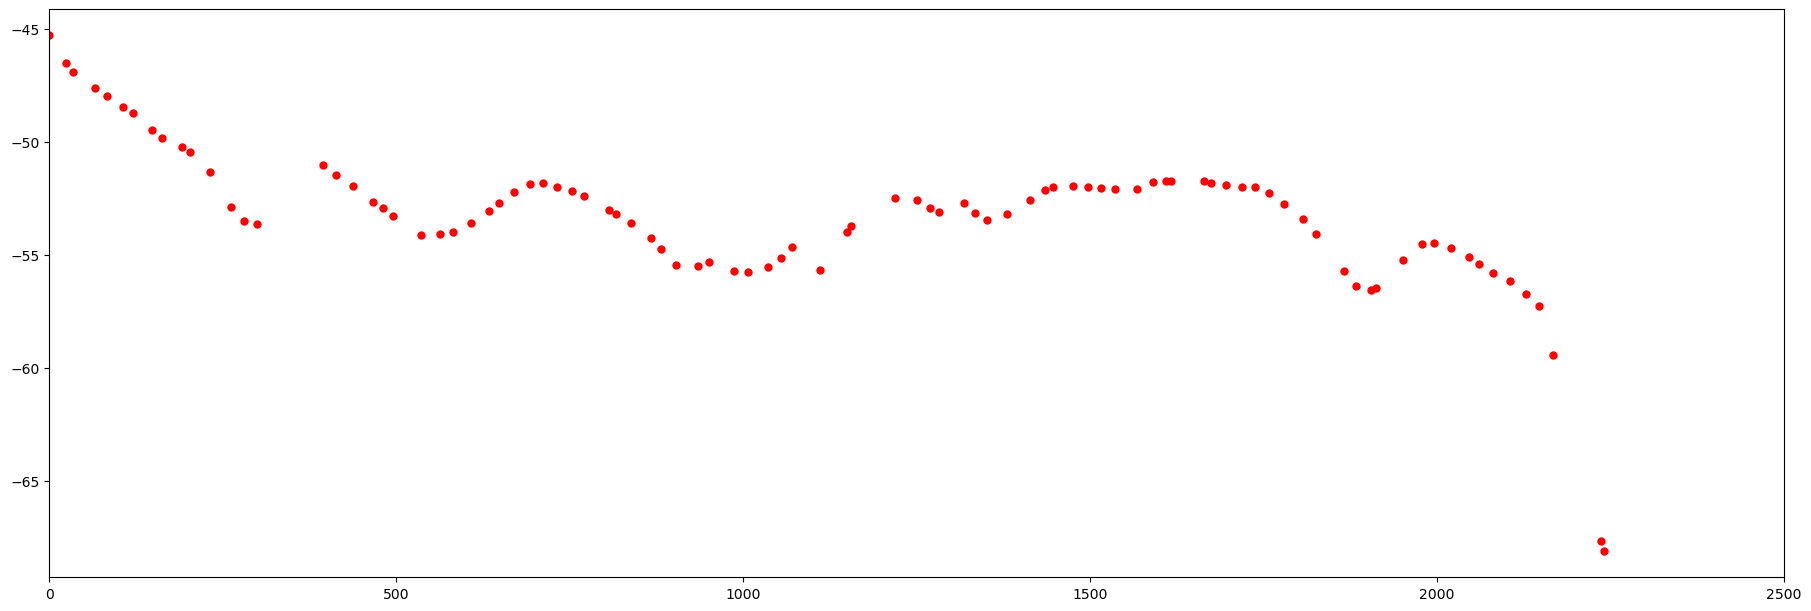

In [27]:
plot_atl06(gdf6, 0, 2500)

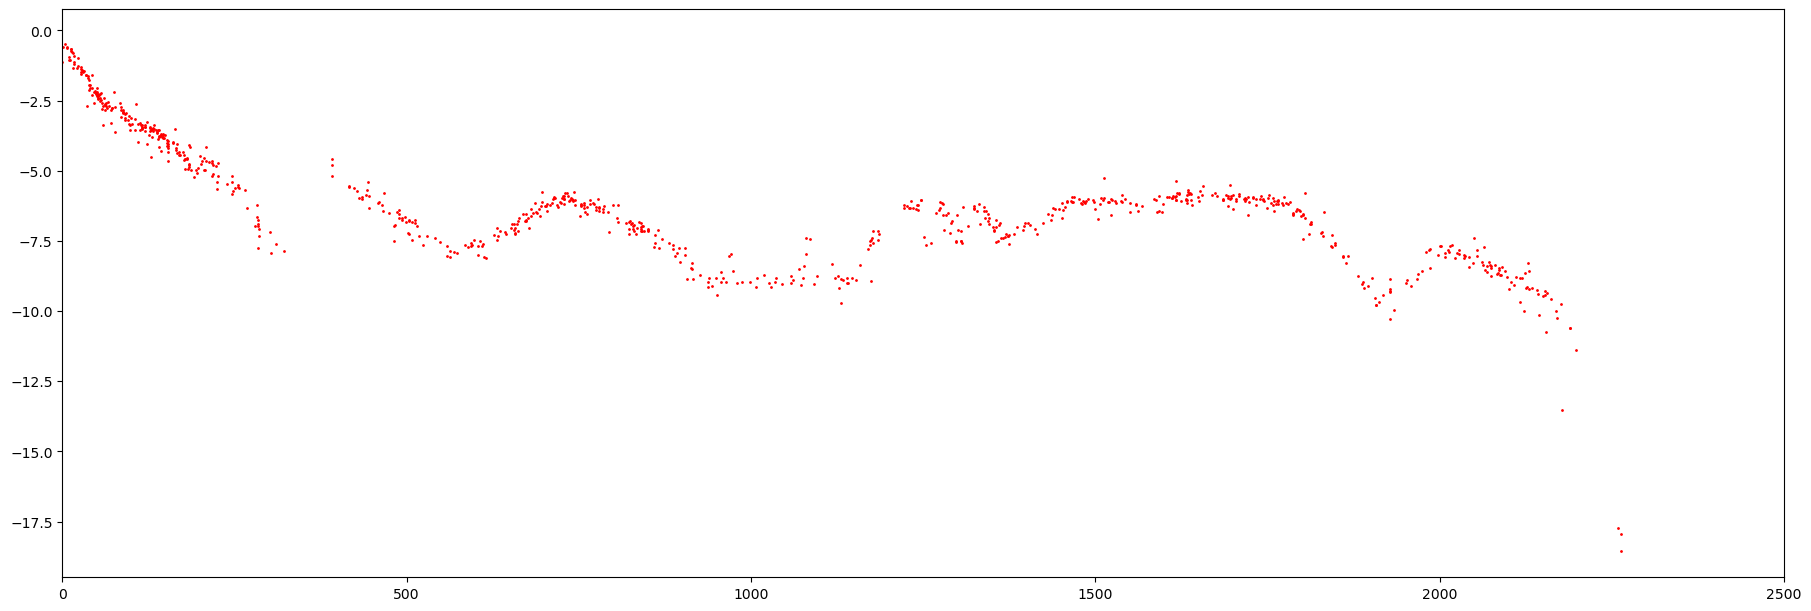

In [28]:
plot_atl24(gdf2, 0, 2500)

## (7) Filtered and Ancillary Access to ATL24

In [29]:
parms = {
    "atl24": {
        "class_ph": ["bathymetry"],
#        "confidence_threshold": 0.6,
#        "invalid_kd": False,
#        "invalid_wind_speed": False,
        "low_confidence": False,
#        "night": True,
#        "sensor_depth_exceeded": False,
        "anc_fields": ["index_ph", "index_seg"]
    },
    "beams": "gt3r",
    "rgt": 202,
    "cycle": 12
}
gdf7 = sliderule.run("atl24x", parms, aoi=aoi)

request <AppServer.63882> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.93203> on ATL24_20210706203010_02021201_006_01_001_01.h5 generated dataframe [gt3r] with 839 rows and 19 columns
Successfully completed processing resource [1 out of 1]: ATL24_20210706203010_02021201_006_01_001_01.h5
Writing arrow file: /tmp/tmpz4o3jz7l
Closing arrow file: /tmp/tmpz4o3jz7l


In [30]:
gdf7

sensor_depth_exceeded  night_flag  region  \
time_ns                                                                    
2021-07-06 20:35:11.700463360                      0           0       1   
2021-07-06 20:35:11.700663040                      0           0       1   
2021-07-06 20:35:11.701063168                      0           0       1   
2021-07-06 20:35:11.701463296                      0           0       1   
2021-07-06 20:35:11.701463296                      0           0       1   
...                                              ...         ...     ...   
2021-07-06 20:35:12.017863168                      0           0       1   
2021-07-06 20:35:12.018363136                      0           0       1   
2021-07-06 20:35:12.018463232                      0           0       1   
2021-07-06 20:35:12.505863168                      0           0       1   
2021-07-06 20:35:12.505963264                      0           0       1   

                               class_ph  gt  sigma_tvu  surface_h  \
time_ns                                                             
2021-07-06 20:35:11.700463360        40  60   0.166414   0.469926   
2021-07-06 20:35:11.700663040        40  60   0.166414   0.470413   
2021-07-06 20:35:11.701063168        40  60   0.166414   0.471875   
2021-07-06 20:35:11.701463296        40  60   0.166414   0.473334   
2021-07-06 20:35:11.701463296        40  60   0.166414   0.473334   
...                                 ...  ..        ...        ...   
2021-07-06 20:35:12.017863168        40  60   0.166415   0.482601   
2021-07-06 20:35:12.018363136        40  60   0.166415   0.481902   
2021-07-06 20:35:12.018463232        40  60   0.166415   0.481733   
2021-07-06 20:35:12.505863168        40  60   0.166415   0.544213   
2021-07-06 20:35:12.505963264        40  60   0.166415   0.543939   

                               invalid_wind_speed  index_seg  sigma_thu  ...  \
time_ns                                                                  ...   
2021-07-06 20:35:11.700463360                   0     107089   7.071084  ...   
2021-07-06 20:35:11.700663040                   0     107089   7.071082  ...   
2021-07-06 20:35:11.701063168                   0     107089   7.071082  ...   
2021-07-06 20:35:11.701463296                   0     107089   7.071082  ...   
2021-07-06 20:35:11.701463296                   0     107089   7.071082  ...   
...                                           ...        ...        ...  ...   
2021-07-06 20:35:12.017863168                   0     107201   7.071239  ...   
2021-07-06 20:35:12.018363136                   0     107202   7.071252  ...   
2021-07-06 20:35:12.018463232                   0     107202   7.071243  ...   
2021-07-06 20:35:12.505863168                   0     107374   7.071199  ...   
2021-07-06 20:35:12.505963264                   0     107375   7.071200  ...   

                               low_confidence_flag  index_ph  confidence  \
time_ns                                                                    
2021-07-06 20:35:11.700463360                    0  12931297    0.835062   
2021-07-06 20:35:11.700663040                    0  12931326    0.834389   
2021-07-06 20:35:11.701063168                    0  12931368    0.902136   
2021-07-06 20:35:11.701463296                    0  12931415    0.903411   
2021-07-06 20:35:11.701463296                    0  12931416    0.896865   
...                                            ...       ...         ...   
2021-07-06 20:35:12.017863168                    0  12949785    0.840347   
2021-07-06 20:35:12.018363136                    0  12949812    0.840347   
2021-07-06 20:35:12.018463232                    0  12949816    0.943537   
2021-07-06 20:35:12.505863168                    0  12972371    0.686516   
2021-07-06 20:35:12.505963264                    0  12972377    0.686516   

                               spot         x_atc        y_atc  srcid  cycle  \
time_ns                           

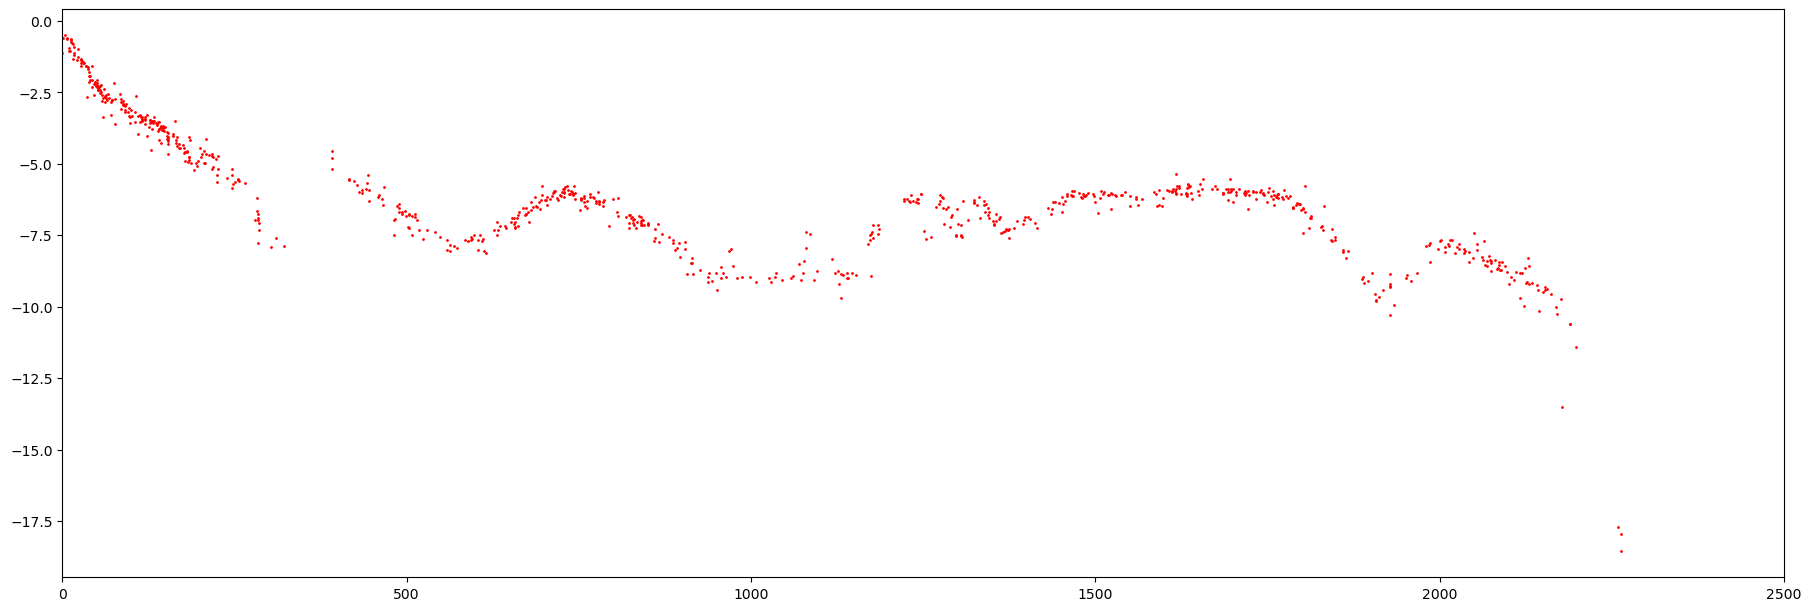

In [31]:
plot_atl24(gdf7, 0, 2500)